#   Bessel Processes Part I

The purpose of this notebook is to provide an illustration of the [Bessel Processes](https://en.wikipedia.org/wiki/Bessel_process) and some of its main properties. 


## Integer Case

Let $W_t = (W^1_t, \cdots, W^n_t)$ be a n-dimensional Browanian Motion for some $n\in\mathbb{N}$. The Bessel process of dimension $n$ is defined as follows 

\begin{equation}
X_t = \|W_t\|,
\end{equation}
where $\| \ \   \| $ denotes the Euclidean norm in $\mathbb{R}^n$. That is, 

\begin{equation}
X_t = \sqrt{\sum_{i=1}^n (W^i_t)^2},
\end{equation}

Observe that given each component $W^i_t\sim \mathcal{N}(0,t)$, by definition. So we can write

\begin{equation*}
X_t =  t \sqrt{ \sum_{i=1}^n \left( \dfrac{W_t^i}{t} \right)^2 }.
\end{equation*}

This implies that $X_t$ is a scaled Chi random variable.

Similarly, we can set
\begin{equation}
X_t^2 = \sum_{i=1}^n (W^i_t)^2.
\end{equation}

Note that each component $W^i_t\sim \mathcal{N}(0,t)$, by definition. So we can write

\begin{equation*}
X_t^2 =  t^2 \sum_{i=1}^n \left( \dfrac{W_t^i}{t} \right)^2.
\end{equation*}

This implies that $X_t^2$ is a scaled Chi-squared random variable.

## Generalisation


Ito's formula implies that

\begin{equation}
dX_t^2 = n dt + \sum_{i=1}^n 2(W^i_t)dW^i_t, \quad t > 0,
\end{equation}

and $X_0=0$.

Now, observe that $\mathbb{P}(X_t = 0) =0$ for any $t>0$. So, we can define the process $B=\{B_t t\geq 0\}$ as

\begin{equation}
B_t = \sum_{i=1}^n  \int_0^t  \dfrac{W_s^i}{X_s}  dW_s^i, \qquad t>0,
\end{equation}

and $B_0=0$.

The key observation here is that 

\begin{equation*}
\langle B, B \rangle_t =  \sum_{i=1}^n \int_0^t \dfrac{(W_s^i)^2}{ X_s^2} ds = t
\end{equation*}

Thus, the process $B$ is a standard one-dimensional Brownian motion. 

Hence, we have 
\begin{equation}
dX_t^2 = n dt + 2 X_t dB_t, \quad t \geq 0,
\end{equation}
which is equivalent to 
\begin{equation}
dY_t = n dt + 2 \sqrt{Y
_t} dB_t,
\end{equation}
where $Y_t = X^2_t$.

For $n>1$, Ito's formula implies
\begin{equation}
dX_t= \dfrac{(n-1)}{2} \dfrac{dt}{X_t} + dB_t,  \quad t\geq 0.
\end{equation}

The case $n=1$ can be derived from Tanaka's formula.

## General Definition

For every $\delta\geq 0$ and $x\geq 0$,  a squared Bessel process with dimension $\delta$, starting at $y$ is defined as the unique stron solution to the SDE

\begin{align}
dY_t &= \delta dt + 2 \sqrt{ Y_t } dB_t,  \qquad t\geq 0 \\
Y_0 & = y,
\end{align}

and is denoted by $BESQ^{\delta}_y$. 

Moreover, the process $X_t = \sqrt{Y_t}$, is called a Bessel process of dimension $\delta$, starting at $x = \sqrt{y}$,  and is denoted by $BES^{\delta}_x$. 

Bessel processes are commonly parameterised as $BES^{(\nu)}$ where $\nu$ is imply  

$$\nu  = \frac{\delta}{2} -1.$$

Hereafter, we are going to use this parameterisation.

### Existence and Uniqueness

In order to demonstrate that equation (5.1) has a solution we need to introduce the following two results which can be found in [Jeanblanc, Yor, Chesney, 2009].


**Theorem 1.** Consider the SDE
\begin{equation}
X_t =X_0 + \int_0^t b(s,X_s) ds + \int_0^t\sigma(s,X_s)dW_s.
\end{equation}
Suppose $\varphi : (0,\infty) \rightarrow (0,\infty)$ is a Borel function such that 

$$ \int_0^{\infty} \dfrac{da}{\varphi(a)}  = \infty.$$

If any of the following conditions holds, then the equation admits a unique solution which is is strong. Moreover the solution $X$ is a Markov process.

1. the function $b$ is bounded, the function $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq \varphi(|x-y|), $$

and $|\sigma|\geq \epsilon >0$.

2. $b$ is Lipschitz continuous, and 

$$ |\sigma(s,x) - \sigma(s, y)|^2 \leq \varphi(|x-y|). $$


3. $b$ is bounded, and $\sigma$ does not depend on the time variable and satisfies

$$ |\sigma(x) - \sigma(y)|^2 \leq |f(x) - f(y)|, $$

where $f$ is a bounded increasing function, $|\sigma|\geq \epsilon >0$.


**Theorem 2. (Comparison Theorem)** Consider the two SDEs

\begin{equation}
dX^i_t = b_i(t, X^i_t) dt + \sigma(t,X^i_t) dW_t, \qquad i =1,2;
\end{equation}
where the functions $b_i$ are both bounded and at least one of them is Lipschitz; and $\sigma$ satisfies condition (2) or (3) in Theorem 1.  Suppose also that $X^1_0 \geq X^2_0,$ and $b_1(x) \geq b_2(x)$. Then $X^1_t \geq X^2_t$ for all $t$, almost surely.



Now, in order to show that (1) has a unique solution we introduce the SDE

\begin{align}
dY_t &= \delta dt + 2 \sqrt{ |Y_t| } dB_t,  \qquad Y_t\geq 0 \\
Y_0 & = y.
\end{align}

Then, using the elementary inequality 

$$|\sqrt{x} - \sqrt{y}| \leq \sqrt{|x-y|},  \qquad x, y \geq 0,$$

Theorem 1 implies that for every $\delta \geq 0$ the equation () has a unique strong solution. Such solution is called the squared Bessel process of dimension $\delta$ and is denoted by $BESQ^{\delta}$.

### Why we can drop the absolute value inside the square root 

First, we should note that if the process starts at zero, i.e. $y=0$, and $\delta=0$, then the $Y=0$ is the unique solution.

Moreover, consider $0\leq \delta \leq \delta'$ and let $Y$ and $Y'$ the corresponding squared Besses processes $BESQ^{\delta}$ and $BESQ^{\delta'}$ both starting at the same initial condition. Then the Comparison Theorem imples that 

$$ 0\leq Y_t \leq Y_t', \qquad \hbox{almost surely.}$$

Thus, $Y$ satistifies $Y_t\geq 0$ for all $t\geq 0$, and the absolute value inside the square root term is not needed. So, hereafter we will ommit it.

## Expectation and Variance

For each $t>0$, the conditional marginal $Y_t|Y_0$ from a squared Bessel process satisfies

\begin{equation*}
\mathbf{E}[Y_t] = \mathbb{E}[Y_t|Y_0=y]= y + \delta t,
\end{equation*}

and

\begin{equation*}
\mathbf{Var} [Y_t ] = \mathbb{Var} [Y_t |Y_0] = 2t(2y + \delta t)
\end{equation*}

### Python Implementation

For given $y, \delta>0$, and $t>0$ we can implement the above formulas for the expectation, and variance, as follows. 

In [44]:
import numpy as np

y0 = 2.5
delta = 3.0
t = 1.0

exp = y0 + delta*t
var = 2.0*t*(2*y0 + delta*t)

print(f'For y_0={y0}' , f'delta={delta}', f't={t}', sep=", ")
print(f'E[Y_t] = {exp: .4f}')
print(f'Var[Y_t] = {var :.4f}')

For y_0=2.5, delta=3.0, t=1.0
E[Y_t] =  5.5000
Var[Y_t] = 16.0000


In [36]:
import matplotlib.pyplot as plt

In [5]:
from aleatory.processes import BESProcess, BESQProcess
bes = BESProcess(dim=10)
besq = BESQProcess(dim=10)

In [65]:
%config InlineBackend.figure_format ='retina'

In [136]:
from scipy.stats import ncx2 

x0 = 0.0
T = 1.0
n = 100
delta = 3.5
times = np.linspace(0, T, n)

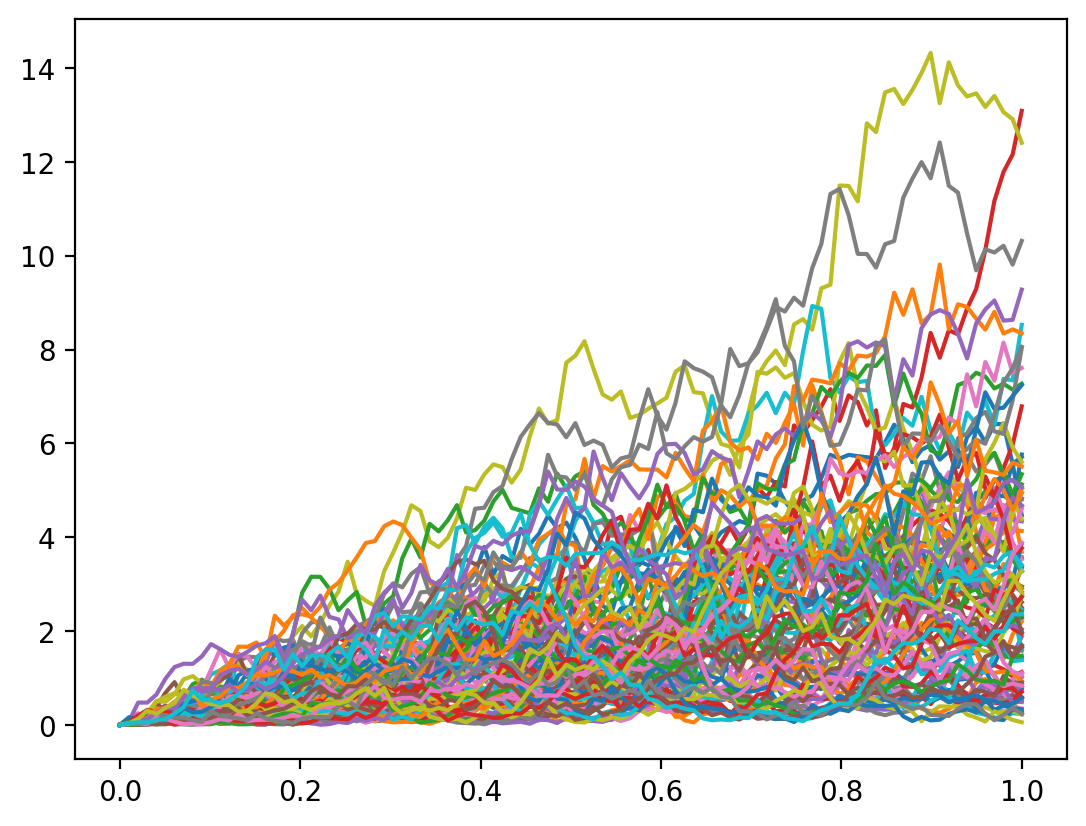

In [137]:

for i in range(100):
     path = [x0]
     x = x0
     for t in times[1:]:
          sample = ncx2(df=delta, nc=x/times[1], scale=times[1]).rvs(1)[0]
          path.append(sample)
          x = sample
     plt.plot(times, path)
plt.show()

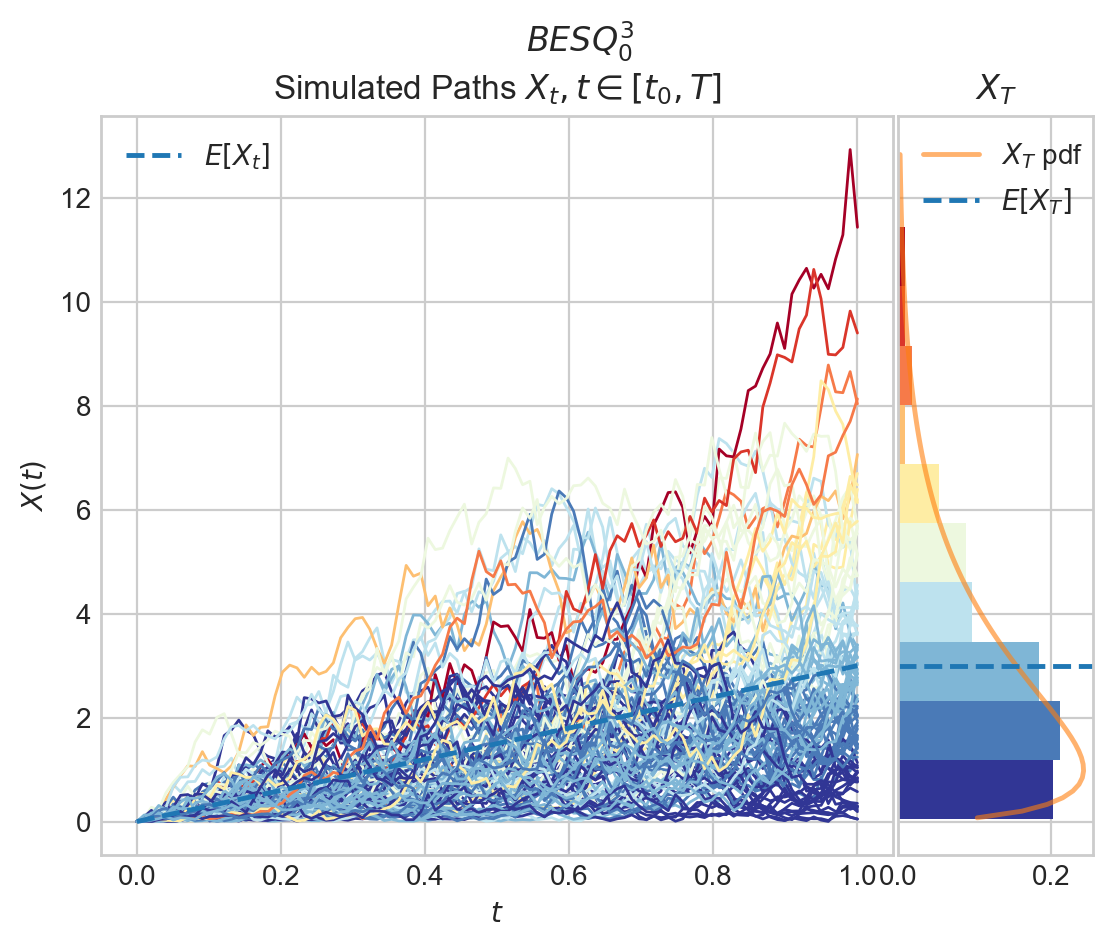

In [135]:
besq = BESQProcess(dim=3)
besq.draw(n=100, N=100);